In [347]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import random
import pickle

In [348]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv')
df.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [349]:
df.shape

(145080, 6)

In [350]:
df.tail()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
145075,2021-06-20,Zimbabwe,NaN,41779,37184.0,1672
145076,2021-06-21,Zimbabwe,NaN,42195,37200.0,1685
145077,2021-06-22,Zimbabwe,NaN,42714,37288.0,1691
145078,2021-06-23,Zimbabwe,NaN,43480,37477.0,1692
145079,2021-06-24,Zimbabwe,NaN,44306,37524.0,1709


In [351]:
df.columns

Index(['Date', 'Country/Region', 'Province/State', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')

In [352]:
df = df.rename(columns = {'Country/Region': 'Country'}, inplace = False)

In [353]:
df['Recovered'].interpolate(method='linear', direction = 'forward', inplace=True)
print(df)

              Date      Country Province/State  Confirmed  Recovered  Deaths
0       2020-01-22  Afghanistan            NaN          0        0.0       0
1       2020-01-23  Afghanistan            NaN          0        0.0       0
2       2020-01-24  Afghanistan            NaN          0        0.0       0
3       2020-01-25  Afghanistan            NaN          0        0.0       0
4       2020-01-26  Afghanistan            NaN          0        0.0       0
...            ...          ...            ...        ...        ...     ...
145075  2021-06-20     Zimbabwe            NaN      41779    37184.0    1672
145076  2021-06-21     Zimbabwe            NaN      42195    37200.0    1685
145077  2021-06-22     Zimbabwe            NaN      42714    37288.0    1691
145078  2021-06-23     Zimbabwe            NaN      43480    37477.0    1692
145079  2021-06-24     Zimbabwe            NaN      44306    37524.0    1709

[145080 rows x 6 columns]


In [354]:
df.isnull().sum()

Date                  0
Country               0
Province/State    99840
Confirmed             0
Recovered             0
Deaths                0
dtype: int64

In [355]:
df1 = df.drop(['Province/State'], axis='columns')
df1.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0


In [356]:
df1.tail()

,Date,Country,Confirmed,Recovered,Deaths
145075,2021-06-20,Zimbabwe,41779,37184.0,1672
145076,2021-06-21,Zimbabwe,42195,37200.0,1685
145077,2021-06-22,Zimbabwe,42714,37288.0,1691
145078,2021-06-23,Zimbabwe,43480,37477.0,1692
145079,2021-06-24,Zimbabwe,44306,37524.0,1709


In [357]:
df1.shape
df1.tail()

,Date,Country,Confirmed,Recovered,Deaths
145075,2021-06-20,Zimbabwe,41779,37184.0,1672
145076,2021-06-21,Zimbabwe,42195,37200.0,1685
145077,2021-06-22,Zimbabwe,42714,37288.0,1691
145078,2021-06-23,Zimbabwe,43480,37477.0,1692
145079,2021-06-24,Zimbabwe,44306,37524.0,1709


In [358]:
df_per_day = df1.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum().reset_index()

In [359]:
df_per_day

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,557,2.997125e+05,17
1,2020-01-23,655,2.996467e+05,18
2,2020-01-24,941,2.995859e+05,26
3,2020-01-25,1433,2.995211e+05,42
4,2020-01-26,2118,2.994673e+05,56
...,...,...,...,...
515,2021-06-20,178488764,1.153337e+08,3866179
516,2021-06-21,178786159,1.156888e+08,3873255
517,2021-06-22,179158296,1.159909e+08,3882237
518,2021-06-23,179595551,1.163893e+08,3891760


In [360]:
df_per_day.describe()

,Confirmed,Recovered,Deaths
count,5.200000e+02,5.200000e+02,5.200000e+02
mean,5.924947e+07,3.524591e+07,1.431987e+06
std,5.804186e+07,3.451547e+07,1.202059e+06
min,5.570000e+02,2.992851e+05,1.700000e+01
25%,6.161658e+06,2.859858e+06,3.904815e+05
50%,3.638062e+07,2.551986e+07,1.109975e+06
75%,1.090169e+08,6.063106e+07,2.474202e+06
max,1.799477e+08,1.166135e+08,3.899043e+06


df_per_day.plot(kind='line',figsize=(20,5))

In [361]:
Top10_Countries_death = df1.nlargest(10, 'Deaths')
Top10_Countries_death.head(10)

,Date,Country,Confirmed,Recovered,Deaths
132599,2021-06-24,US,33590481,0.0,603178
132598,2021-06-23,US,33577651,0.0,602837
132597,2021-06-22,US,33565215,0.0,602462
132596,2021-06-21,US,33554275,0.0,602092
132595,2021-06-20,US,33541887,0.0,601824
132594,2021-06-19,US,33537995,0.0,601741
132593,2021-06-18,US,33529475,0.0,601571
132592,2021-06-17,US,33508867,0.0,600978
132591,2021-06-16,US,33498468,0.0,600697
132590,2021-06-15,US,33486038,0.0,600329


In [362]:
Top10_Countries_confirmed = df1.nlargest(10, 'Confirmed')
Top10_Countries_confirmed.head(10)

,Date,Country,Confirmed,Recovered,Deaths
132599,2021-06-24,US,33590481,0.0,603178
132598,2021-06-23,US,33577651,0.0,602837
132597,2021-06-22,US,33565215,0.0,602462
132596,2021-06-21,US,33554275,0.0,602092
132595,2021-06-20,US,33541887,0.0,601824
132594,2021-06-19,US,33537995,0.0,601741
132593,2021-06-18,US,33529475,0.0,601571
132592,2021-06-17,US,33508867,0.0,600978
132591,2021-06-16,US,33498468,0.0,600697
132590,2021-06-15,US,33486038,0.0,600329


In [363]:
Top10_Countries_recovered = df1.nlargest(10, 'Recovered')
Top10_Countries_recovered.head(10)

,Date,Country,Confirmed,Recovered,Deaths
76958,2021-06-23,India,30082778,29063740.0,391981
76959,2021-06-24,India,30082778,29063740.0,391981
76957,2021-06-22,India,30028709,28994855.0,390660
76956,2021-06-21,India,29977861,28926038.0,389302
76955,2021-06-20,India,29935221,28844199.0,388135
76954,2021-06-19,India,29881772,28765738.0,386708
76953,2021-06-18,India,29823546,28678390.0,385137
76952,2021-06-17,India,29762793,28580647.0,383490
76951,2021-06-16,India,29700313,28491670.0,381903
76950,2021-06-15,India,29633105,28388100.0,379573


In [364]:
#conda install libpython m2w64-toolchain -c msys2

In [365]:
#pip install pystan==2.19.1.1

In [366]:
#pip install prophet

In [367]:
#conda info

In [368]:
#conda update conda

In [369]:
#conda install libpython m2w64-toolchain -c msys2

In [370]:
#conda install numpy cython matplotlib scipy pandas pystan -c conda-forge

In [371]:
#Model Intialize
conf = Prophet(interval_width=0.95)

In [372]:
conf.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [373]:
confirmed = df1.groupby('Date').sum()['Confirmed'].reset_index()
recovered = df1.groupby('Date').sum()['Recovered'].reset_index()
deaths = df1.groupby('Date').sum()['Deaths'].reset_index()

In [374]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [375]:
conf.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [376]:
conf.component_modes

{'additive': ['monthly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [377]:
conf_future = conf.make_future_dataframe(periods=30)

In [378]:
df1.tail()

,Date,Country,Confirmed,Recovered,Deaths
145075,2021-06-20,Zimbabwe,41779,37184.0,1672
145076,2021-06-21,Zimbabwe,42195,37200.0,1685
145077,2021-06-22,Zimbabwe,42714,37288.0,1691
145078,2021-06-23,Zimbabwe,43480,37477.0,1692
145079,2021-06-24,Zimbabwe,44306,37524.0,1709


In [379]:
conf_future.tail()

,ds
545,2021-07-20
546,2021-07-21
547,2021-07-22
548,2021-07-23
549,2021-07-24


In [380]:
forecast = conf.predict(conf_future)
forecast[['ds','yhat','yhat_lower','yhat_upper']][-30:]

,ds,yhat,yhat_lower,yhat_upper
520,2021-06-25,1.855402e+08,1.836941e+08,1.873094e+08
521,2021-06-26,1.862342e+08,1.844116e+08,1.880630e+08
522,2021-06-27,1.868334e+08,1.851590e+08,1.886521e+08
523,2021-06-28,1.874017e+08,1.855572e+08,1.892688e+08
524,2021-06-29,1.880114e+08,1.859837e+08,1.899886e+08
525,2021-06-30,1.886671e+08,1.869879e+08,1.904795e+08
526,2021-07-01,1.893396e+08,1.875615e+08,1.911625e+08
527,2021-07-02,1.900678e+08,1.882188e+08,1.919246e+08
528,2021-07-03,1.906791e+08,1.887886e+08,1.925947e+08
529,2021-07-04,1.912310e+08,1.893367e+08,1.932246e+08


In [381]:
from prophet.diagnostics import cross_validation, performance_metrics
df1 = cross_validation(conf, horizon='90 days')
df_p = performance_metrics(df1)
df_p.head(5)

INFO:prophet:Making 4 forecasts with cutoffs between 2020-11-11 00:00:00 and 2021-03-26 00:00:00


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,6.218010e+12,2.493594e+06,2.010616e+06,0.026640,0.016283,0.027057,0.25
1,10 days,7.131687e+12,2.670522e+06,2.133138e+06,0.028131,0.017721,0.028595,0.25
2,11 days,8.071437e+12,2.841028e+06,2.259480e+06,0.029598,0.019817,0.030103,0.25
3,12 days,9.069365e+12,3.011539e+06,2.393466e+06,0.031092,0.022256,0.031635,0.25
4,13 days,1.017511e+13,3.189845e+06,2.542671e+06,0.032701,0.024388,0.033287,0.25


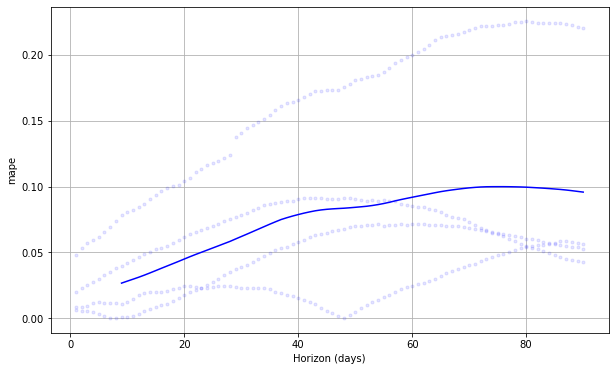

In [382]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df1, metric='mape')

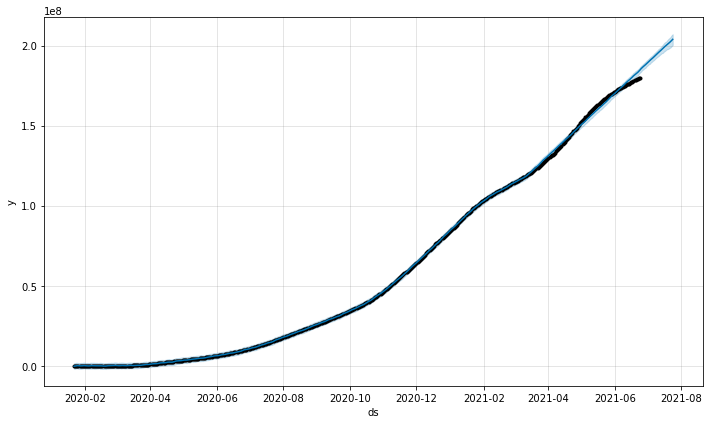

In [285]:
confirmed_forecast_plot = conf.plot(forecast)

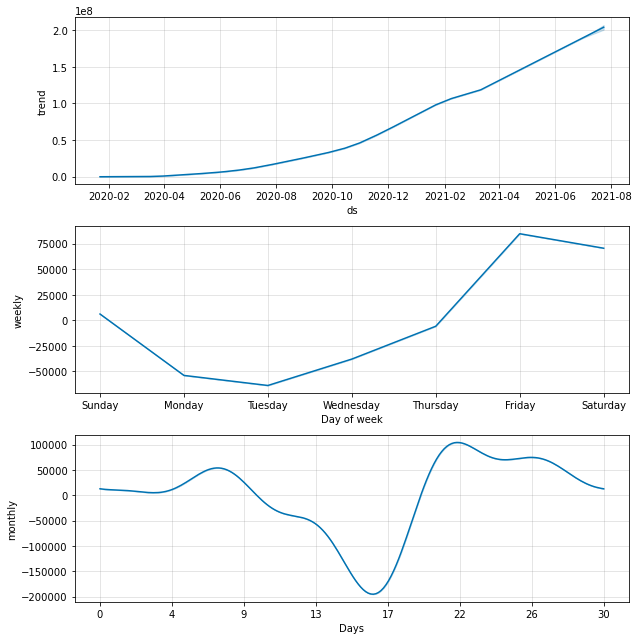

In [286]:
confirmed_forecast_plot = conf.plot_components(forecast)

In [287]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [288]:
d = Prophet(interval_width=0.95)

In [289]:
d.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [290]:
d.fit(deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [291]:
future = d.make_future_dataframe(periods=30)

In [292]:
future.tail()

,ds
545,2021-07-20
546,2021-07-21
547,2021-07-22
548,2021-07-23
549,2021-07-24


In [293]:
forecast = d.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']][-30:]

,ds,yhat,yhat_lower,yhat_upper
520,2021-06-25,3.951747e+06,3.936707e+06,3.966775e+06
521,2021-06-26,3.963705e+06,3.948143e+06,3.979056e+06
522,2021-06-27,3.973683e+06,3.958614e+06,3.989526e+06
523,2021-06-28,3.984364e+06,3.969935e+06,3.999363e+06
524,2021-06-29,3.997468e+06,3.982022e+06,4.013403e+06
525,2021-06-30,4.010683e+06,3.994926e+06,4.025702e+06
526,2021-07-01,4.023463e+06,4.005694e+06,4.041429e+06
527,2021-07-02,4.036542e+06,4.019954e+06,4.055001e+06
528,2021-07-03,4.047728e+06,4.030285e+06,4.066233e+06
529,2021-07-04,4.057136e+06,4.038886e+06,4.076694e+06


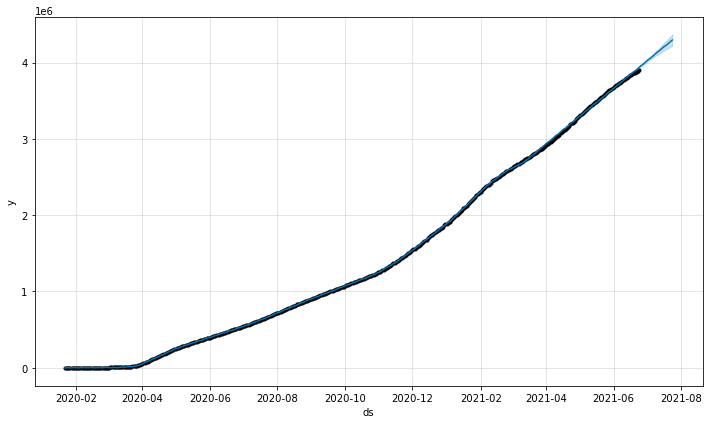

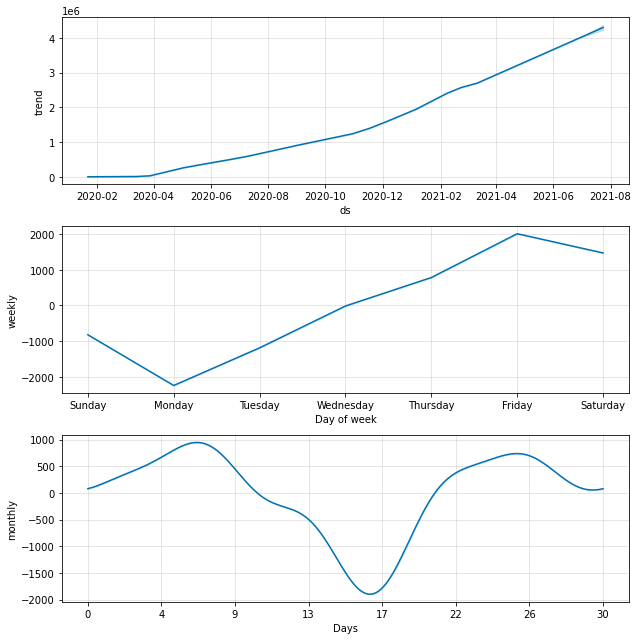

In [294]:
deaths_forecast_plot = d.plot(forecast)
deaths_forecast_plot = d.plot_components(forecast)

In [295]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [296]:
rec = Prophet()

In [297]:
rec.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [298]:
rec.fit(recovered)

rec_future = rec.make_future_dataframe(periods=30)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [299]:
rec_future.tail()

,ds
545,2021-07-20
546,2021-07-21
547,2021-07-22
548,2021-07-23
549,2021-07-24


In [300]:
forecast = rec.predict(rec_future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2021-07-20,1.311372e+08,1.295290e+08,1.327828e+08
546,2021-07-21,1.316687e+08,1.299870e+08,1.333280e+08
547,2021-07-22,1.321668e+08,1.303844e+08,1.339284e+08
548,2021-07-23,1.326933e+08,1.309845e+08,1.345333e+08
549,2021-07-24,1.332439e+08,1.314218e+08,1.351100e+08


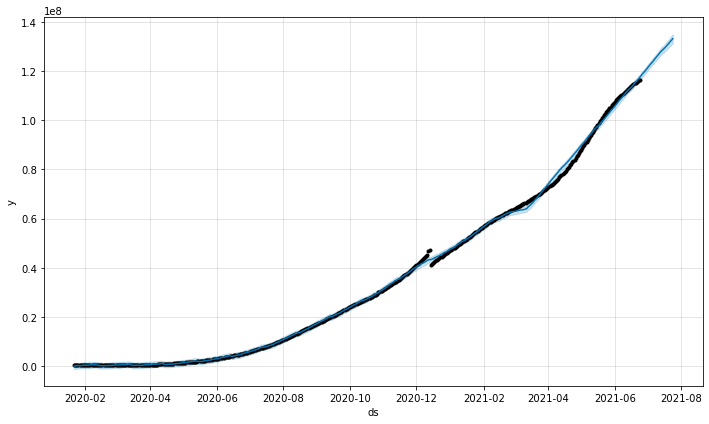

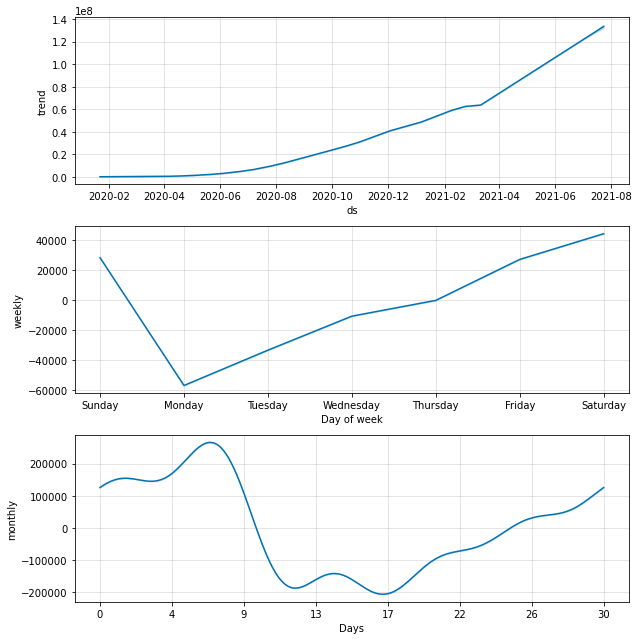

In [301]:
recovered_forecast_plot = rec.plot(forecast)
recovered_forecast_plot = rec.plot_components(forecast)

In [388]:
pickle.dump(rec,open('RECmodel.pkl','wb'))
pickle.dump(conf,open('CONFmodel.pkl','wb'))
pickle.dump(d,open('DEATHmodel.pkl','wb'))

In [390]:
import pickle
with open('forecast_model.pckl', 'wb') as fout:
    pickle.dump(conf, fout)
with open('forecast_model.pckl', 'rb') as fin:
    m2 = pickle.load(fin)

In [384]:
from flask import Flask, jsonify, request


In [385]:
future2 = m2.make_future_dataframe(periods=30)
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2021-07-20,2.012253e+08,1.979378e+08,2.040870e+08
546,2021-07-21,2.018346e+08,1.984499e+08,2.048974e+08
547,2021-07-22,2.024597e+08,1.989866e+08,2.054567e+08
548,2021-07-23,2.031867e+08,1.993454e+08,2.066186e+08
549,2021-07-24,2.038658e+08,1.998494e+08,2.072407e+08


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:3000/ (Press CTRL+C to quit)
